# Optimization and optimal control 2016

## Introduction
This demonstrates the general functionality of python in combination with numpy, scipy and matplotlib.

For a way more general introduction look a http://www.scipy-lectures.org/intro/

In order have access to functionality of modules we need to import them

In [36]:
%matplotlib notebook
import numpy as np

## General math

In [37]:
1 + 1

2

In [38]:
1.0 + 1.5

2.5

** ATTENTION ** Use floating point definitions for divisions (just use them everywhere, which could possibly be a floating point number ** ATTENTION **

In [39]:
2 / 5

0

In [40]:
2.0 / 5.0

0.4

## Linear algebra operations
We are only using the numpy array objects, even for matrices!

In [41]:
v = np.array([0, 1, 2])
print(v)

[0 1 2]


Matrices are represented as 2D arrays

In [42]:
A = np.array([[0, 1, 2],[3, 4, 5], [6, 7, 8]])
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
A.dot(v)

array([ 5, 14, 23])

In [44]:
A.dot(A)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [45]:
0.5 * v

array([ 0. ,  0.5,  1. ])

In [46]:
0.5 * A

array([[ 0. ,  0.5,  1. ],
       [ 1.5,  2. ,  2.5],
       [ 3. ,  3.5,  4. ]])

In [47]:
v * A

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

## Control flow

In [48]:
if 2**2 == 4:
    print('Correct!')

Correct!


In [49]:
a = 10
if a == 1:
    print(1)
elif a == 2:
    print(2)
else:
    print('Not found')

Not found


In [50]:
for i in range(4):
    print(i)

0
1
2
3


## Function definitions

In [51]:
def mySquareFunction(input_value):
    return input_value**2.0

# Call the function
mySquareFunction(2.0)

4.0

## Optimization specific tools

In [52]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Let us assume we want to minimize the Rosenbrock problem which reads
$$ \text{min } f(\vec{x}) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2 $$
We need to define a function which evaluates the the equation at the point $\vec{x}$.

In [53]:
def rosen(x):
    """The Rosenbrock function"""
    return 100.0*(x[0] - x[1]**2.0)**2.0 + (1.0 - x[1])**2.0

Now lets plot the function

<IPython.core.display.Javascript object>


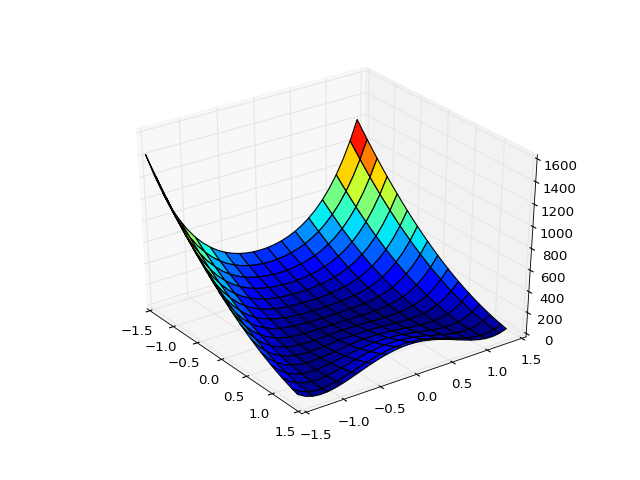

In [57]:
X = np.arange(-1.5, 1.5, 0.1)
Y = np.arange(-1.5, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
Z = rosen(np.array([X,Y]))
surf = ax.plot_surface(X, Y, Z,
                       rstride=2,   # row step size
                       cstride=2,   # column step size
                       cmap=cm.jet, # colour map
                       linewidth=1, # wireframe line width
                       antialiased=True)

Let us find the minimum of $f(x)$. We define an initial guess and use the build in Nelder-Mead method.

In [55]:
x0 = np.array([-1.0, -1.0])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 97
         Function evaluations: 185


In [56]:
print('The resulting minimum of f(x) = {}'.format(res.x))

The resulting minimum of f(x) = [ 1.  1.]
